![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Noelia's ML_OPS Project!  👻👻

###  Notebook: Data preparation for Recomendation System

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Import Zone

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Load datasets

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [3]:
df1 = pd.read_csv('../data/clean/all_together_with_score.csv',index_col=0)
df2 = pd.read_csv('../data/clean/all_ratings.csv', index_col=0)

In [4]:
df2.head()

,userId,score,movieId
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Severely unbalanced dataset

There are many more reviews between 3 and 4, than reviews less than 2.5
> The median will give around 3.5

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

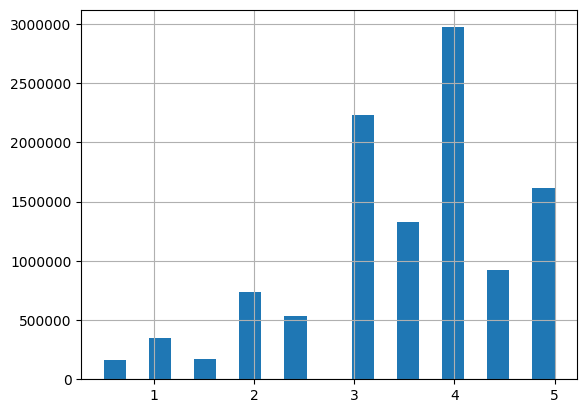

In [5]:
ax = df2['score'].hist(bins=20)
ax.ticklabel_format(useOffset=False, style='plain')

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### How many reviews has each movie?



All the movies have between 296 and 576 reviews.
> There is a clear imbalance.

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

 min reviews per movie -->   396
 max reviews per movie -->   576


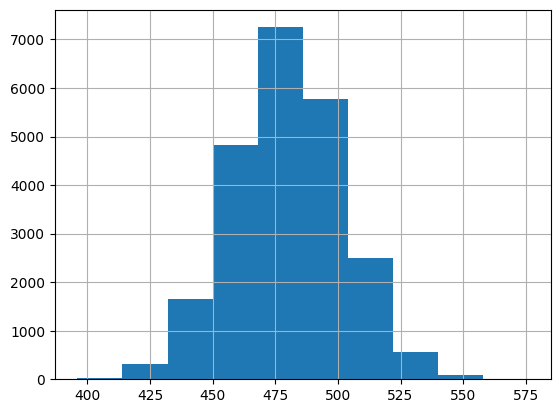

In [6]:
reviews_per_movies= df2.groupby('movieId').count().sort_values(by='score')['userId']
min_rev_mv = reviews_per_movies.min()
max_rev_mv = reviews_per_movies.max()
reviews_per_movies.hist()

print(" min reviews per movie -->  ", min_rev_mv)
print(" max reviews per movie -->  ", max_rev_mv)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Number of reviews per user

Users with:
* 1 review or less = 2129 <br>
* 10 reviews or less = 18872<br>
* 15 reviews or less = 33056<br>
* 20 reviews or less = 46658<br>

There is a user with more than 18.000 reviews --> Whaaat?? I consider it as an outlier

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [7]:
reviews_by_users= df2.groupby('userId').count().sort_values(by='score')['movieId']

rev_by_usr_desc = reviews_by_users.describe()
rev_total = reviews_by_users.shape[0]  # Users with revisions
rev_user_med = rev_by_usr_desc['50%']  # Median
rev_user_Q1 = rev_by_usr_desc['25%']   # First quartil
rev_user_Q3 = rev_by_usr_desc['75%']   # Third quartil
rev_min = reviews_by_users.min()
rev_max = reviews_by_users.max()
rev_1 = reviews_by_users.loc[reviews_by_users <= 1].shape[0]
rev_2 = reviews_by_users.loc[reviews_by_users <= 2].shape[0]
rev_10 = reviews_by_users.loc[reviews_by_users <= 10].shape[0]
rev_20 = reviews_by_users.loc[reviews_by_users <= 20].shape[0]


print("--------------------------------------------------------------------------------------")
print("Total users--> ", rev_total)
print("--------------------------------------------------------------------------------------")
print('number of users with 1 review --> ', rev_1)
print('number of users with  2 review or less --> ', rev_2)
print('number of users with  10 review or less --> ', rev_10)
print('number of users with  20 review or less --> ', rev_20)
print("--------------------------------------------------------------------------------------")
print('number of reviews made by 25% of users (Q1)--> ', rev_user_Q1)
print('number of reviews made by 50% of users (median)--> ', rev_user_med)
print('number of reviews made by 75% de of users (Q3)--> ', rev_user_Q3)
print("--------------------------------------------------------------------------------------")
print("Minimum number of revisions --> ", rev_min)
print("Maximum number of revisions --> ", rev_max)
print("--------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------
Total users-->  115077
--------------------------------------------------------------------------------------
number of users with 1 review -->  2129
number of users with  2 review or less -->  3658
number of users with  10 review or less -->  18872
number of users with  20 review or less -->  46658
--------------------------------------------------------------------------------------
number of reviews made by 25% of users (Q1)-->  15.0
number of reviews made by 50% of users (median)-->  30.0
number of reviews made by 75% de of users (Q3)-->  92.0
--------------------------------------------------------------------------------------
Minimum number of revisions -->  1
Maximum number of revisions -->  18276
--------------------------------------------------------------------------------------


---
### Histogram

I must use the range parameter because there are several "outliers" that have made more than 2000 reviews, and therefore the histogram is distorted.

---

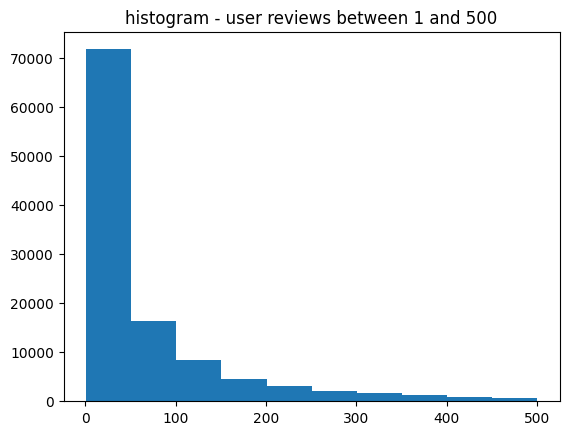

In [11]:

plt.hist(reviews_by_users, bins=10,range=(1,500))
plt.title("Histogram - user reviews between 1 and 500")
plt.show()

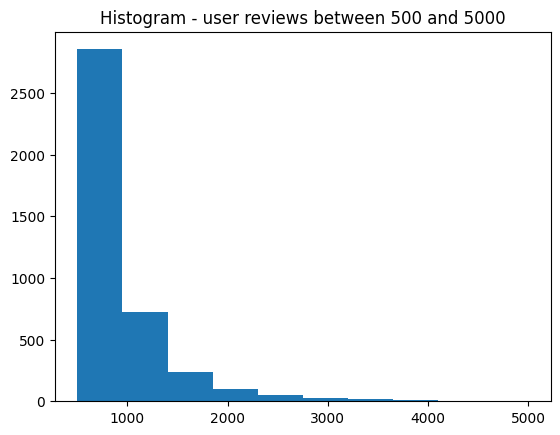

In [12]:
plt.hist(reviews_by_users, bins=10,range=(500,5000))
plt.title("Histogram - user reviews between 500 and 5000")
plt.show()

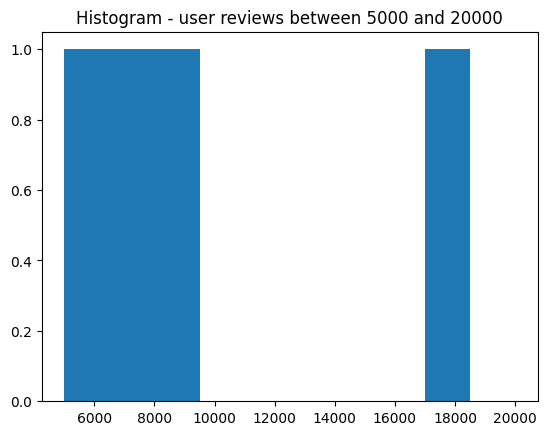

In [14]:
plt.hist(reviews_by_users, bins=10,range=(5000,20000))
plt.title("Histogram - user reviews between 5000 and 20000")
plt.show()

In [15]:
print("more than 1000 reviews --> ",reviews_by_users.loc[reviews_by_users>1000].count())
print("between 500 and 1000 reviews --> ",reviews_by_users.loc[(reviews_by_users<=1000) & (reviews_by_users>500)].count())
print("between 100 and 500 reviews --> ",reviews_by_users.loc[(reviews_by_users<=500) & (reviews_by_users>100)].count())
print("between 50 and 100 reviews --> ",reviews_by_users.loc[(reviews_by_users<=100) & (reviews_by_users>50)].count())
print("between 50 and 100 reviews --> ",reviews_by_users.loc[(reviews_by_users<=100) & (reviews_by_users>50)].count())
print("between 15 and 50 reviews --> ",reviews_by_users.loc[(reviews_by_users<=50) & (reviews_by_users>=15)].count())

more than 1000 reviews -->  1047
between 500 and 1000 reviews -->  2954
between 100 and 500 reviews -->  22809
between 50 and 100 reviews -->  16444
between 50 and 100 reviews -->  16444
between 15 and 50 reviews -->  46962


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### User filtering

#### To apply collaborative filtering, we require a sufficient number of user reviews. Thus, we will first eliminate users who have submitted 50 or fewer reviews.

* We are going to keep the users who have made at least 50 reviews
* For now, we will not be adding an upper bound

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [16]:

upper_boundary = reviews_by_users.max()
lower_boundary = 50
rev_user_IQR = rev_user_Q3 - rev_user_Q1  # not used


mask_IQR_sup = reviews_by_users <= upper_boundary
mask_Q1 = reviews_by_users>= lower_boundary


reviews_by_user_filter = reviews_by_users.loc[mask_IQR_sup & mask_Q1]
reviews_by_user_filter

userId
61547        50
59991        50
11378        50
37182        50
124318       50
          ...  
24025      4946
70648      5356
270123     7638
8659       9279
45811     18276
Name: movieId, Length: 43886, dtype: int64

---
### Histogram of filtered data
---

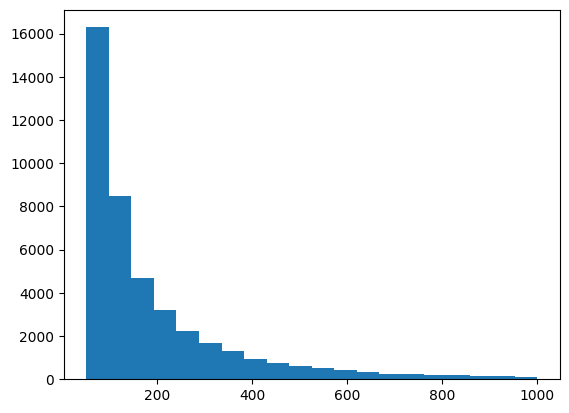

In [21]:
plt.hist(reviews_by_user_filter,bins=20, range = (50,1000))
plt.show()


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Filtered dataframe

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



In [22]:
users_selected = reviews_by_user_filter.index.to_list()
# users_selected
mask = df2['userId'].isin(users_selected)
df3 = df2.loc[mask]

In [25]:
df3.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,userId,score
count,9684773.00,9684773.00
mean,89666.30,3.52
std,86677.63,1.05
min,4.00,0.50
25%,28512.00,3.00
50%,56704.00,3.50
75%,116753.00,4.00
max,270896.00,5.00


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### We verified that the distribution, maximum, and minimum number of reviews per movie have not been significantly altered

No major changes

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

 min reviews per movie -->   345
 max reviews per movie -->   513


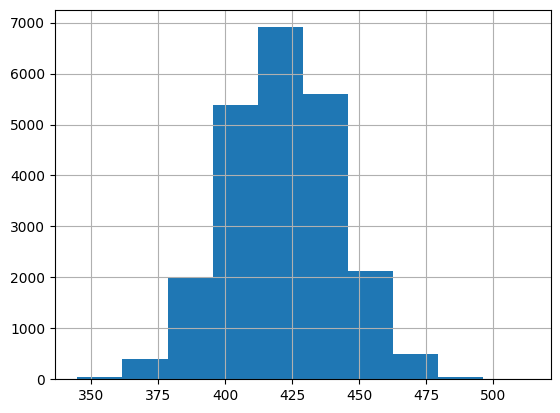

In [26]:
reviews_per_movies_with_filter = df3.groupby('movieId').count().sort_values(by='score')['userId']
min_rev_mv = reviews_per_movies_with_filter.min()
max_rev_mv = reviews_per_movies_with_filter.max()
reviews_per_movies_with_filter.hist()

print(" min reviews per movie -->  ", min_rev_mv)
print(" max reviews per movie -->  ", max_rev_mv)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Save clean data

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [27]:
import os

# Individual

root_path = '../data/clean/filter/'
isExist = os.path.exists(root_path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(root_path)

df3.to_csv(root_path+"all_rating_filtered.csv")